# Heart Failure Dataset 

# Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Capstone /heart_failure_clinical_records_dataset.csv')

<Axes: >

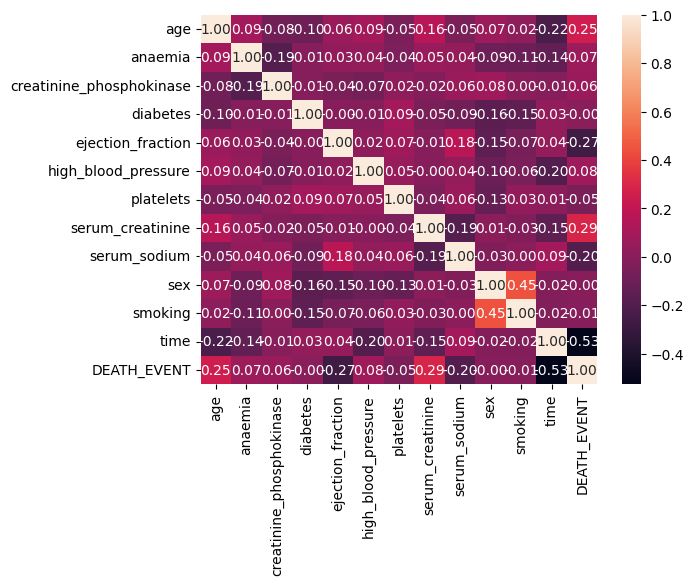

In [183]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f')

In [ ]:
print(df.head()) #DEATH_EVENT  

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [ ]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [ ]:
#df['DEATH_EVENT'].plot() #distribution
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
#df.drop(df[df['DEATH_EVENT'] ==0].index, inplace = True)
result = df.loc[df['DEATH_EVENT'] ==0]
result_zero= result.sample(96)
result_zero.shape

(96, 13)

In this code block, I am rebalancing the dataset, the first line drops all the rows from the DataFrame where the value of the column 'DEATH_EVENT' is equal to 0 (indicating the patient did not die during the follow-up period).

The second line creates a new DataFrame result containing only the rows where the value of 'DEATH_EVENT' is 0 (meaning the patient did not die).

The third line samples 96 random rows from the result DataFrame and assigns it to a new DataFrame result_zero. This step is likely done to balance the data set since there are more rows where the patient died (DEATH_EVENT = 1) than where the patient did not die (DEATH_EVENT = 0).

In [ ]:
result_one = df.loc[df['DEATH_EVENT'] ==1]
result_one

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1


In [ ]:
result_zero

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
90,70.0,0,66,1,45,0,249000.0,0.8,136,1,1,80,0
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,1,212,0
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0
83,79.0,1,55,0,50,1,172000.0,1.8,133,1,0,78,0
277,70.0,0,582,1,38,0,25100.0,1.1,140,1,0,246,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,50.0,0,369,1,25,0,252000.0,1.6,136,1,0,90,0
285,55.0,1,170,1,40,0,336000.0,1.2,135,1,0,250,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0


In [ ]:
balanced_result= pd.concat([result_one, result_zero])

In [ ]:
data= balanced_result.copy()

In [ ]:
data.to_csv("/content/drive/MyDrive/Machine Learning Capstone /balanced_heart_failure.csv")

In [ ]:
data.shape

(192, 13)

In [ ]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,50.0,0,369,1,25,0,252000.00,1.6,136,1,0,90,0
285,55.0,1,170,1,40,0,336000.00,1.2,135,1,0,250,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
256,65.0,0,326,0,38,0,294000.00,1.7,139,0,0,220,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

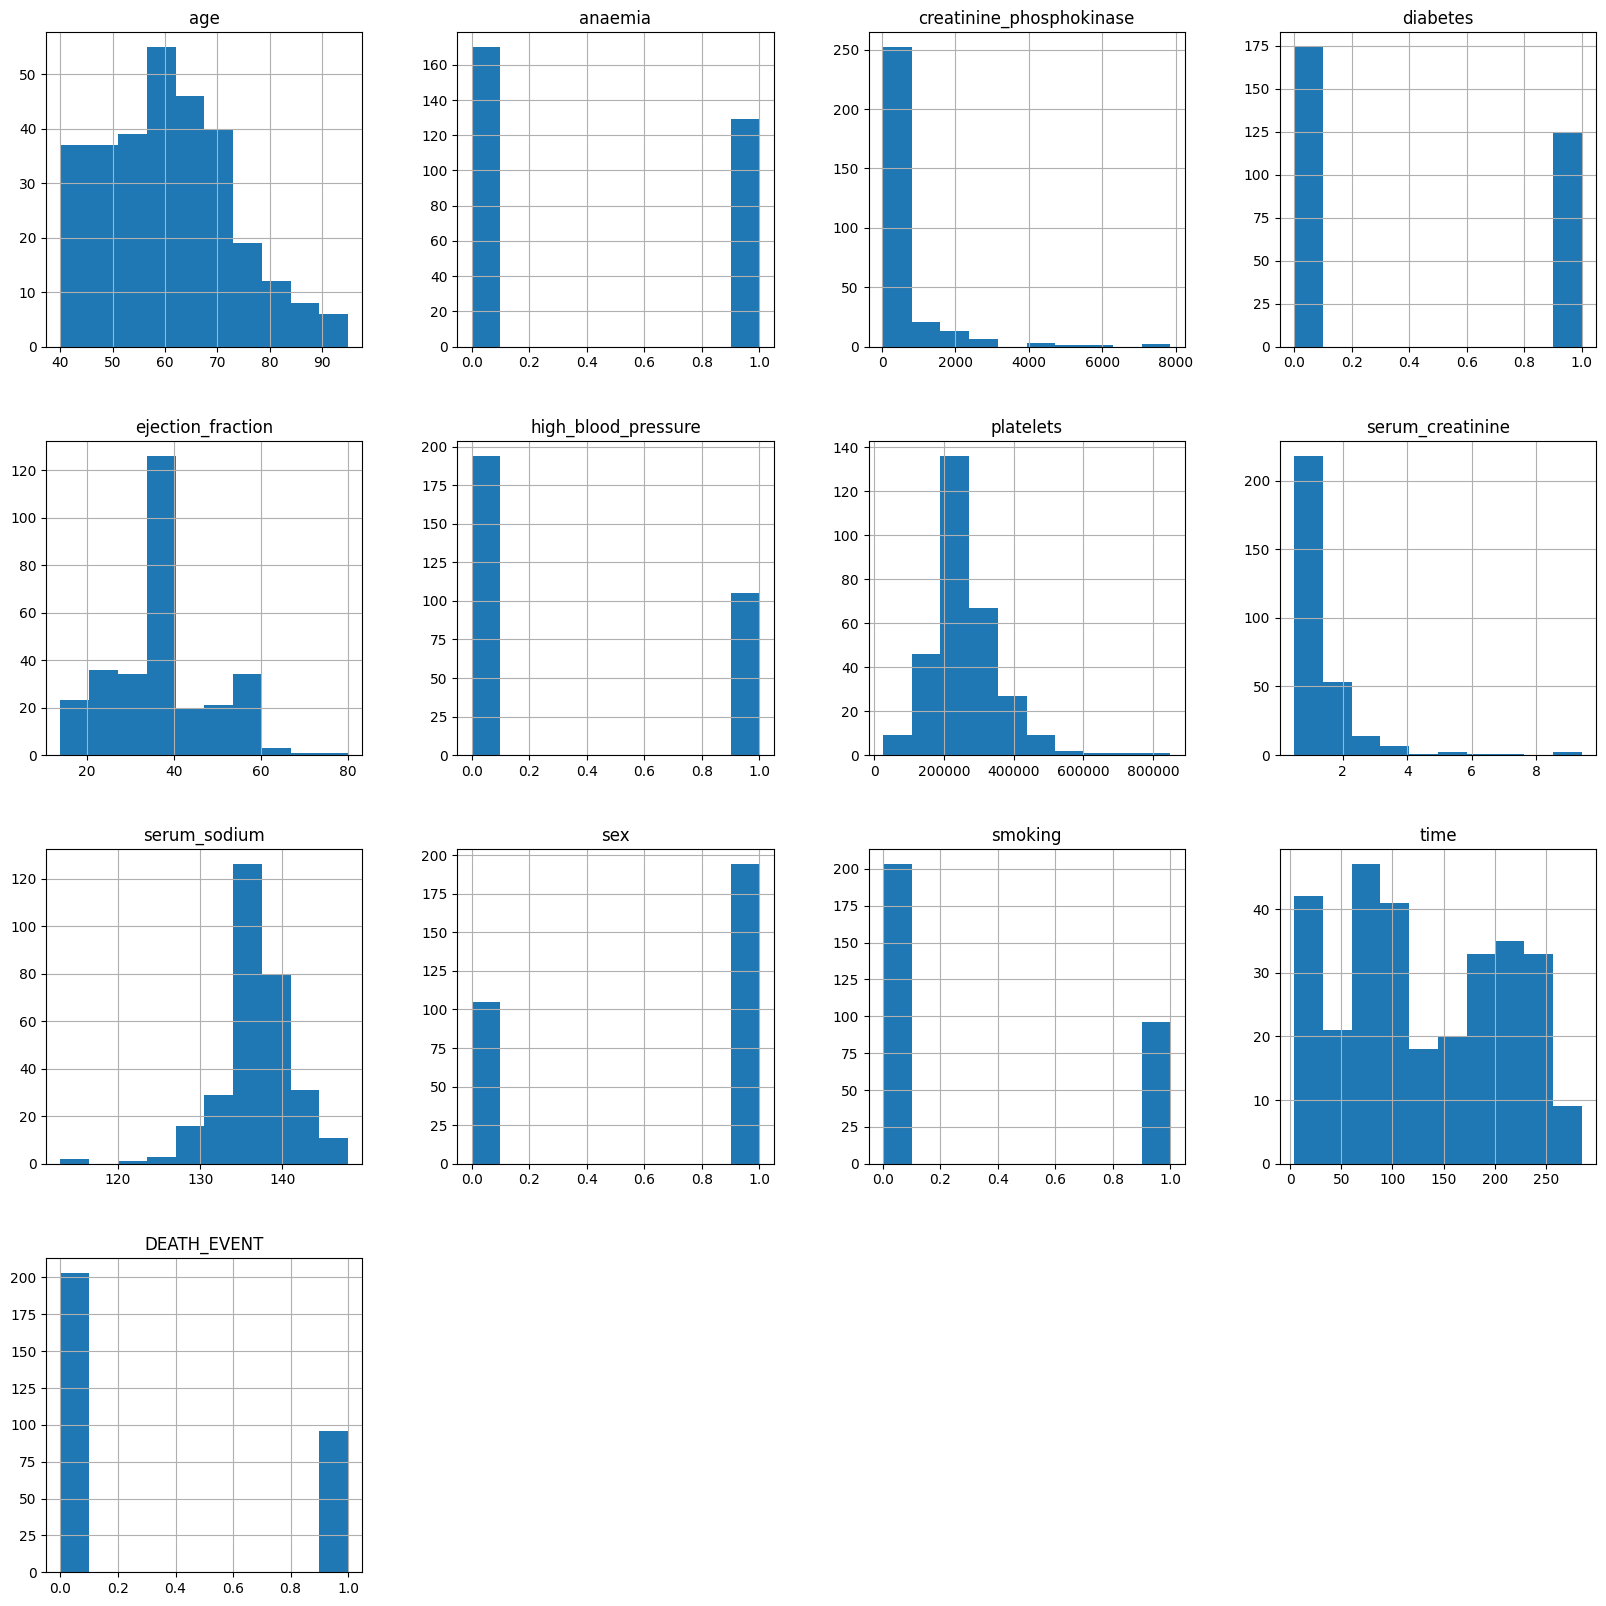

In [178]:
def show_hist(data):
    return df.hist(figsize=(20,20))
show_hist(df)

In [ ]:
print(df.shape) #This function returns the number of rows and columns in the DataFrame, excluding DEATH_EVENT  

(299, 13)


In [ ]:
print(df.info()) #This function provides information about the DataFrame, including the data types of each column and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


keep only integer values? and drop floats? 

In [188]:
print(df.describe()) #summary statistics for each numeric column

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

ValueError: ignored

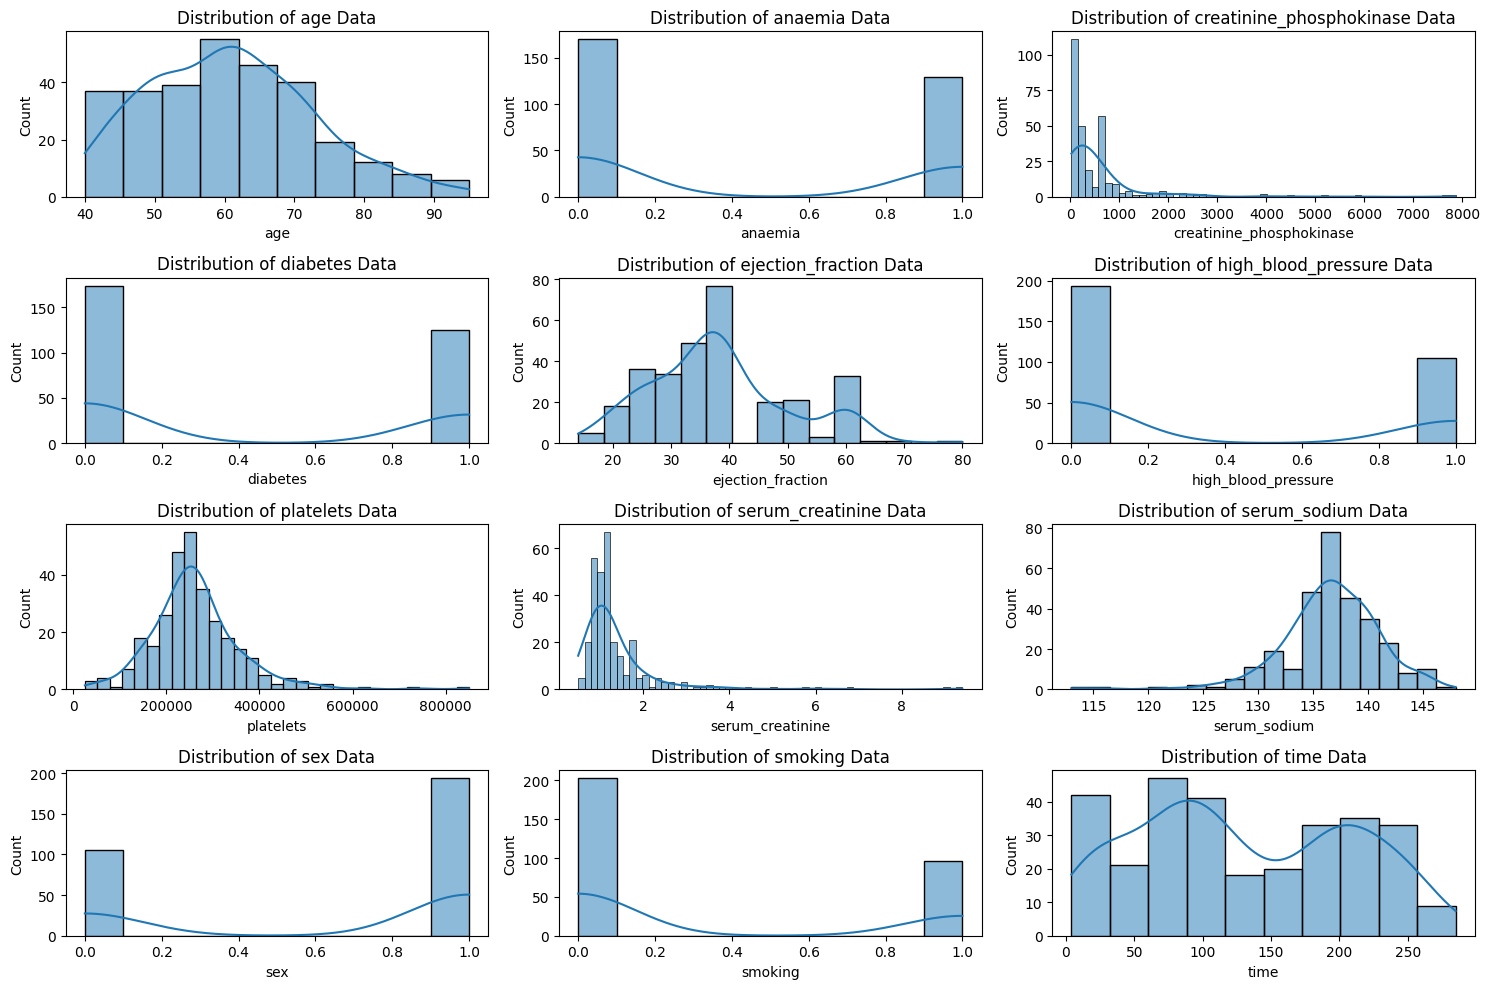

In [187]:
# Load the heart data from a CSV file
heart = pd.read_csv('/content/drive/MyDrive/Machine Learning Capstone /heart_failure_clinical_records_dataset.csv')

plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Distribution of {col} Data')
    sns.histplot(heart[col],kde=True) ##kde for lining
    plt.tight_layout() ## adjust the title and x title

The dataset is imbalanced, meaning that the number of samples in the two classes (i.e., death event = 1 or death event = 0) is not equal. This can lead to issues with model performance, as the model may become biased towards the majority class and have difficulty predicting the minority class. Therefore, it is important to address this issue by using techniques such as resampling, class weighting, or adjusting the decision threshold.

# RNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
# Split data into features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# smote df
'''
#Split data into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

from imblearn.over_sampling import SMOTE

# instantiate SMOTE
sm = SMOTE(random_state=42)

# apply SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)'''


In [ ]:
# Define RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model to training data
model.fit(X_train, y_train, epochs=150, batch_size=32)


Epoch 1/150
4/4 [==============================] - 8s 32ms/step - loss: 0.6989 - accuracy: 0.4783
Epoch 2/150
4/4 [==============================] - 0s 26ms/step - loss: 0.6915 - accuracy: 0.5304
Epoch 3/150
4/4 [==============================] - 0s 32ms/step - loss: 0.6935 - accuracy: 0.5565
Epoch 4/150
4/4 [==============================] - 0s 26ms/step - loss: 0.6868 - accuracy: 0.6348
Epoch 5/150
4/4 [==============================] - 0s 33ms/step - loss: 0.6857 - accuracy: 0.6261
Epoch 6/150
4/4 [==============================] - 0s 29ms/step - loss: 0.6834 - accuracy: 0.6522
Epoch 7/150
4/4 [==============================] - 0s 25ms/step - loss: 0.6784 - accuracy: 0.5565
Epoch 8/150
4/4 [==============================] - 0s 26ms/step - loss: 0.6711 - accuracy: 0.5565
Epoch 9/150
4/4 [==============================] - 0s 25ms/step - loss: 0.6585 - accuracy: 0.7130
Epoch 10/150
4/4 [==============================] - 0s 32ms/step - loss: 0.6490 - accuracy: 0.6870
Epoch 11/150
4/4 [=

In [ ]:
#Test the model
loss, accuracy = model.evaluate(X_test, y_test) 


3/3 [==============================] - 1s 10ms/step - loss: 0.6288 - accuracy: 0.7922


Overfitting: It is possible that the training data and the testing data are different, and that the RNN model is overfitting to the training data. This means that the model is performing well on the training data but is not generalizing well to new data, which is the testing data.

When a model overfits to the training data, it memorizes the patterns in the data instead of learning to generalize. This can lead to a high accuracy on the training data but a low accuracy on the testing data.

In [ ]:
#Predict using the model
predictions = model.predict(X_test)
y_pred = np.round(predictions)

3/3 [==============================] - 1s 9ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

#Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[32  7]
 [10 28]]


# CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import EarlyStopping

In [ ]:
#Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

'''# define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# train the model with early stopping
model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_split=0.2, callbacks=[early_stop])'''

model.fit(X_train, y_train, epochs=1000, batch_size=32, )


Epoch 1/1000
4/4 [==============================] - 1s 7ms/step - loss: 2254.9385 - accuracy: 0.4348
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 1920.5652 - accuracy: 0.4957
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 1337.5735 - accuracy: 0.4957
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 398.1088 - accuracy: 0.5043
Epoch 5/1000
4/4 [==============================] - 0s 8ms/step - loss: 258.9750 - accuracy: 0.5217
Epoch 6/1000
4/4 [==============================] - 0s 8ms/step - loss: 112.4738 - accuracy: 0.4783
Epoch 7/1000
4/4 [==============================] - 0s 8ms/step - loss: 242.2832 - accuracy: 0.4957
Epoch 8/1000
4/4 [==============================] - 0s 8ms/step - loss: 409.3346 - accuracy: 0.4957
Epoch 9/1000
4/4 [==============================] - 0s 9ms/step - loss: 653.1512 - accuracy: 0.5043
Epoch 10/1000
4/4 [==============================] - 0s 7ms/step - loss: 603.1332 - accuracy: 0.4

In [ ]:
#Test the model
loss, accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 25.7748 - accuracy: 0.4935


CNN is computer vision 
rnn is for nlp

In [ ]:
#Predict using the model
predictions = model.predict(X_test)
y_pred = np.round(predictions)

3/3 [==============================] - 0s 3ms/step


In [ ]:
#Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm) # this is shows how the data is biased to zero

[[10 29]
 [10 28]]


The confusion matrix [10 29],[10 28] for the CNN on Heart failure clinical records Data Set suggests that the model predicted 10 true positives, 28 true negatives, 10 false positives, and 29 false negatives.

This means that the model correctly predicted 10 patients who died during the follow-up period, and 28 patients who survived. However, it incorrectly predicted that 10 patients would die when they actually survived, and 29 patients would survive when they actually died.

# CNN Model Two 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Capstone /heart_failure_clinical_records_dataset.csv')

In [ ]:
#Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']], df['DEATH_EVENT'], test_size=0.3, random_state=42)


In [ ]:
#Preprocess the data
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
class_weight = {0: 1., 1: 10.} # increase weight of minority class
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

Epoch 1/50
6/6 [==============================] - 1s 46ms/step - loss: 3901.2461 - accuracy: 0.6436 - val_loss: 84.0233 - val_accuracy: 0.9524
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 2888.6018 - accuracy: 0.5638 - val_loss: 258.8617 - val_accuracy: 0.9524
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 1577.4032 - accuracy: 0.5851 - val_loss: 120.1766 - val_accuracy: 0.9524
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 956.8734 - accuracy: 0.5638 - val_loss: 47.9672 - val_accuracy: 0.9524
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 833.1982 - accuracy: 0.5160 - val_loss: 54.3130 - val_accuracy: 0.9524
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 626.3593 - accuracy: 0.5479 - val_loss: 25.7760 - val_accuracy: 0.9524
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 436.1818 - accuracy: 0.5213 - val_loss: 16.5189 - val_accuracy: 0.9524
Epoc

In [ ]:
#Test the model
loss, accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 1.2720 - accuracy: 0.5889


In [ ]:
#Predict using the model
predictions = model.predict(X_test)
y_pred = np.round(predictions)

3/3 [==============================] - 0s 4ms/step


In [ ]:
#Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[53  0]
 [37  0]]


In [ ]:
from sklearn.metrics import classification_report

#Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        53
           1       0.00      0.00      0.00        37

    accuracy                           0.59        90
   macro avg       0.29      0.50      0.37        90
weighted avg       0.35      0.59      0.44        90



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The output of the classification report for a binary classification model. It includes several metrics that describe the performance of the model on the test set:

Precision: Precision is the number of true positives divided by the sum of true positives and false positives. In this case, for the 0 class (the first row), the precision is 0.59. This means that out of all the examples the model predicted as belonging to the 0 class, 59% of them were actually true positives (i.e., they actually belong to the 0 class).

Recall: Recall is the number of true positives divided by the sum of true positives and false negatives. In this case, for the 0 class, the recall is 1.0. This means that out of all the examples that actually belong to the 0 class, the model correctly identified all of them.

F1-score: The F1-score is the harmonic mean of precision and recall. It is a single value that summarizes the performance of the model on both precision and recall. In this case, for the 0 class, the F1-score is 0.74.

Support: The support is the number of examples in the test set that belong to each class.

Accuracy: Accuracy is the number of correct predictions divided by the total number of predictions. In this case, the accuracy is 0.59, which means that the model predicted the correct class for 59% of the examples in the test set.

Macro avg: The macro average is the average of the precision, recall, and F1-score across both classes. In this case, the macro average precision is 0.29, the macro average recall is 0.5, and the macro average F1-score is 0.37.

Weighted avg: The weighted average is the average of the precision, recall, and F1-score weighted by the support of each class. In this case, the weighted average precision is 0.35, the weighted average recall is 0.59, and the weighted average F1-score is 0.44.

In summary, the classification report provides a detailed breakdown of the model's performance on the test set, including metrics that describe precision, recall, and accuracy for each class as well as overall macro- and weighted-averages of these metrics.

# SOM

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from matplotlib import animation, colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data_wrong =  pd.read_csv('/content/drive/MyDrive/Machine Learning Capstone /balanced_heart_failure.csv',index_col=0)

data=data_wrong.reset_index().drop(['index'],axis=1)

data_x = data.iloc[:,:-1]
data_y = data.iloc[:,-1]

In [ ]:
data_x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
187,50.0,0,369,1,25,0,252000.00,1.6,136,1,0,90
188,55.0,1,170,1,40,0,336000.00,1.2,135,1,0,250
189,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
190,65.0,0,326,0,38,0,294000.00,1.7,139,0,0,220


In [ ]:
# Helper functions

# Data Normalization
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

# Euclidean distance
def e_distance(x,y):
    return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
    return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
    winner = [0,0]
    shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
    input_data = data[t]
    for row in range(num_rows):
        for col in range(num_cols):
            distance = e_distance(som[row][col], data[t])
            if distance < shortest_distance: 
                shortest_distance = distance
                winner = [row,col]
    return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
    coefficient = 1.0 - (np.float64(step)/max_steps)
    learning_rate = coefficient*max_learning_rate
    neighbourhood_range = ceil(coefficient * max_m_dsitance)
    return learning_rate, neighbourhood_range

In [ ]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(75000)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform data
normalized_data = scaler.fit_transform(data_x)

train_x_norm = normalized_data.copy()

In [ ]:
#main function

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
    if (step+1) % 5000 == 0:
        print("Iteration: ", step+1) # print out the current iteration for every 5k
    learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

    t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols) ##########################################
    for row in range(num_rows):
        for col in range(num_cols):
            if m_distance([row,col],winner) <= neighbourhood_range:
                som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  5000
Iteration:  10000
Iteration:  15000
Iteration:  20000
Iteration:  25000
Iteration:  30000
Iteration:  35000
Iteration:  40000
Iteration:  45000
Iteration:  50000
Iteration:  55000
Iteration:  60000
Iteration:  65000
Iteration:  70000
Iteration:  75000
SOM training completed


In [ ]:
data_y_label=data_y.reset_index().drop(['index'],axis=1)

I am resetting the index of a Pandas DataFrame called data_y and then dropping the old index column for synchronization purposes. When a DataFrame is created in Pandas, it is assigned an index by default, which is a unique identifier for each row. In this case, it was necessary to reset the index to default integer values as the orginal index is not useful for the analysis. 


In [ ]:
data_y_label

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
187,0
188,0
189,0
190,0


In [ ]:
# collecting labels

data_y_label=data_y
label_data = data_y_label
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
    for col in range(num_cols):
        map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
    if (t+1) % 1000 == 0:
        print("sample data: ", t+1)
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

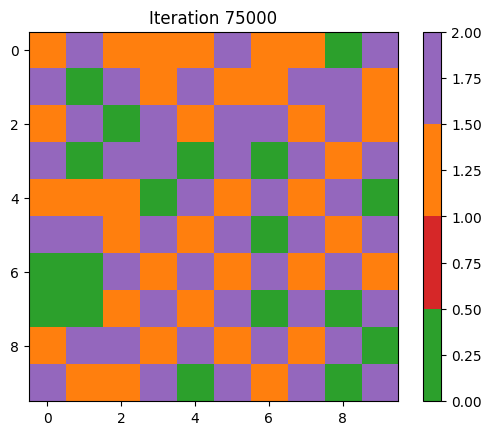

In [ ]:
#after mapping x and y: 10 by 10 50000
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
    for col in range(num_cols):
        label_list = map[row][col]
        if len(label_list)==0:
            label = 2
        else:
            label = max(label_list, key=label_list.count)
        label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red','tab:orange','tab:purple'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [ ]:
label_map

array([[1, 2, 1, 1, 1, 2, 1, 1, 0, 2],
       [2, 0, 2, 1, 2, 1, 1, 2, 2, 1],
       [1, 2, 0, 2, 1, 2, 2, 1, 2, 1],
       [2, 0, 2, 2, 0, 2, 0, 2, 1, 2],
       [1, 1, 1, 0, 2, 1, 2, 1, 2, 0],
       [2, 2, 1, 2, 1, 2, 0, 2, 1, 2],
       [0, 0, 2, 1, 2, 1, 2, 1, 2, 1],
       [0, 0, 1, 2, 1, 2, 0, 2, 0, 2],
       [1, 2, 2, 1, 2, 1, 2, 1, 2, 0],
       [2, 1, 1, 2, 0, 2, 1, 2, 0, 2]])

The SOM has two main clusters represented by the labels 0 (green) and 1 (orange). The label 0 is associated with "death" while the label 1 is associated with "alive". The third label, 2, appears to represent a background or outlier cluster that is colored in purple in the legend.



In [ ]:
data = train_x_norm # normalisation

winner_labels = []

for t in range(data.shape[0]):
    winner = winning_neuron(data, t, som, num_rows, num_cols)
    row = winner[0]
    col = winner[1]
    predicted = label_map[row][col]
    winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(data_y_label, np.array(winner_labels)))

Accuracy:  0.7604166666666666


In [ ]:
print(winner_labels) #what each record falls under 


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]


# K-Means 

In [160]:
# create MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform data
normalized_data = scaler.fit_transform(data_x)

train_x_norm2 = normalized_data.copy()

kmeans = KMeans(n_clusters =2).fit(train_x_norm2)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

In [ ]:
data_y

0      1
1      1
2      1
3      1
4      1
      ..
187    0
188    0
189    0
190    0
191    0
Name: DEATH_EVENT, Length: 192, dtype: int64

In [161]:
# Compare the two arrays element-wise and generate a boolean array
matches = (data_y == kmeans.labels_)

# Count the number of matching elements and divide by the total number of elements
accuracy = np.sum(matches) / float(matches.size)

print("Accuracy: ", accuracy)

Accuracy:  0.5364583333333334


K-means clustering is not the best ML tool to be used in this analysis for the Heart Failure clinical records data set as the accuracy is 50%, it means that the clustering algorithm is assigning half of the observations to the correct cluster.

K-means clustering is an unsupervised learning algorithm, which means that there are no predefined labels or target variables to compare the results against. Therefore, the accuracy metric in this case may not be the most informative or appropriate measure of the algorithm's performance.

In [162]:
data_x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
187,50.0,0,369,1,25,0,252000.00,1.6,136,1,0,90
188,55.0,1,170,1,40,0,336000.00,1.2,135,1,0,250
189,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
190,65.0,0,326,0,38,0,294000.00,1.7,139,0,0,220


In [ ]:
data_x.iloc[:, 0]

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
187    50.0
188    55.0
189    45.0
190    65.0
191    50.0
Name: age, Length: 192, dtype: float64

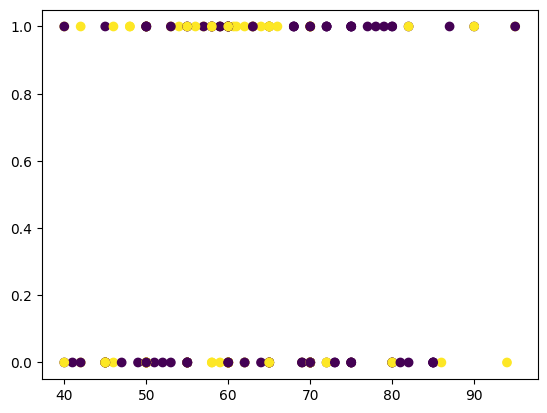

In [ ]:
# Plot the data points and cluster centers
plt.scatter(data_x.iloc[:, 0], data_x.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, linewidths=2, color='r')
plt.show()

In [164]:
#find the distribution of target variable 
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

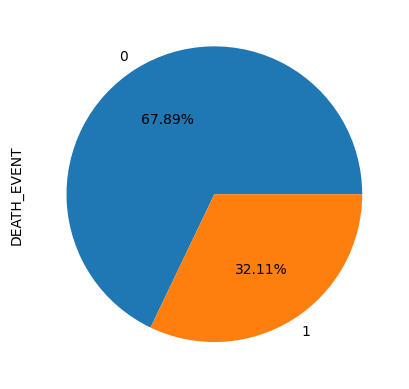

In [159]:
#Find the percentage distribution of target variable 
df['DEATH_EVENT'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

# Regression 

In [166]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
#call the model
model=LogisticRegression()

In [167]:
x=df.drop(columns='DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [168]:
#Train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(239, 12) (239,) (60, 12) (60,)


In [169]:
import warnings 
warnings.filterwarnings('ignore')

In [170]:
#Model Evaluation
model.fit(x_train,y_train)

LogisticRegression()

In [171]:
y_train_prediction=model.predict(x_train)

In [172]:
#Accuracy on training data
accuracy=accuracy_score(y_train,y_train_prediction)
print(accuracy)

0.8200836820083682


In [173]:
print('Accuracy on the training data',round(accuracy,4)*100,'%')

Accuracy on the training data 82.01 %


In [174]:
y_test_prediction=model.predict(x_test)

In [175]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_test_prediction)
print(cf_matrix)

[[40  3]
 [ 5 12]]


In [176]:
#find the elements of confusion matrix
tn,fp,fn,tp=cf_matrix.ravel()
print(tn,fp,fn,tp)

40 3 5 12


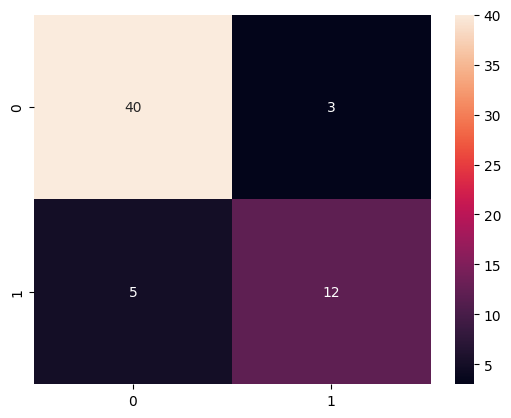

In [177]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)
plt.show()